## The cell below will get the data file, you only need to run it once 

(you do not need to do this if you have done it in the Interfacing_R notebook)

In [1]:
!rm sequence.index 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index -O sequence.index

--2016-02-05 15:50:22--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index
           => 'sequence.index'
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/historical_data/former_toplevel ... done.
==> SIZE sequence.index ... 67069489
==> PASV ... done.    ==> RETR sequence.index ... done.
Length: 67069489 (64M) (unauthoritative)

sequence.index      100%[=====================>]  63.96M   419KB/s   in 2m 27s 

2016-02-05 15:52:54 (445 KB/s) - 'sequence.index' saved [67069489]



In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2

%load_ext rpy2.ipython

In [2]:
%%R
seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

In [5]:
%R head(seq.data)

,FASTQ_FILE,MD5,RUN_ID,STUDY_ID,STUDY_NAME,CENTER_NAME,SUBMISSION_ID,SUBMISSION_DATE,SAMPLE_ID,SAMPLE_NAME,...,RUN_BLOCK_NAME,INSERT_SIZE,LIBRARY_LAYOUT,PAIRED_FASTQ,WITHDRAWN,WITHDRAWN_DATE,COMMENT,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
1,data/NA19238/sequence_read/ERR000018.filt.fast...,3b092ef1661e2a8ff85050e01242707d,ERR000018,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000212,NA19238,...,-2147483648,0,SINGLE,,0,,,9280498,334097928,high coverage
2,data/NA19238/sequence_read/ERR000019.filt.fast...,fcb89b0a755773872f1b073d0a518e0a,ERR000019,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000212,NA19238,...,-2147483648,0,SINGLE,,0,,,9571982,344591352,high coverage
3,data/NA19240/sequence_read/ERR000020.filt.fast...,dcd4ff7db25a75e462beaa75eb167bea,ERR000020,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000214,NA19240,...,-2147483648,345,PAIRED,,0,,,149044,5365584,high coverage
4,data/NA19240/sequence_read/ERR000020_1.filt.fa...,fb5d7eb5137aa173f9f9ec344bd7a8e7,ERR000020,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000214,NA19240,...,-2147483648,345,PAIRED,data/NA19240/sequence_read/ERR000020_2.filt.fa...,0,,,2057690,74076840,high coverage
5,data/NA19240/sequence_read/ERR000020_2.filt.fa...,398fe2bcba33927eda185721f4976fb9,ERR000020,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000214,NA19240,...,-2147483648,345,PAIRED,data/NA19240/sequence_read/ERR000020_1.filt.fa...,0,,,2057690,74076840,high coverage
6,data/NA19238/sequence_read/ERR000021.filt.fast...,52fcfd7f50d9224e8f9e860973449e73,ERR000021,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000212,NA19238,...,-2147483648,0,SINGLE,,0,,,9388168,337974048,high coverage


In [6]:
seq_data = %R seq.data
print(type(seq_data))  #pandas dataframe!

<class 'pandas.core.frame.DataFrame'>


In [7]:
my_col = list(seq_data.columns).index("CENTER_NAME")
seq_data['CENTER_NAME'] = seq_data['CENTER_NAME'].apply(lambda x: x.upper())

In [8]:
seq_data.head()

,FASTQ_FILE,MD5,RUN_ID,STUDY_ID,STUDY_NAME,CENTER_NAME,SUBMISSION_ID,SUBMISSION_DATE,SAMPLE_ID,SAMPLE_NAME,...,RUN_BLOCK_NAME,INSERT_SIZE,LIBRARY_LAYOUT,PAIRED_FASTQ,WITHDRAWN,WITHDRAWN_DATE,COMMENT,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
1,data/NA19238/sequence_read/ERR000018.filt.fast...,3b092ef1661e2a8ff85050e01242707d,ERR000018,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000212,NA19238,...,-2147483648,0,SINGLE,,0,,,9280498,334097928,high coverage
2,data/NA19238/sequence_read/ERR000019.filt.fast...,fcb89b0a755773872f1b073d0a518e0a,ERR000019,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000212,NA19238,...,-2147483648,0,SINGLE,,0,,,9571982,344591352,high coverage
3,data/NA19240/sequence_read/ERR000020.filt.fast...,dcd4ff7db25a75e462beaa75eb167bea,ERR000020,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000214,NA19240,...,-2147483648,345,PAIRED,,0,,,149044,5365584,high coverage
4,data/NA19240/sequence_read/ERR000020_1.filt.fa...,fb5d7eb5137aa173f9f9ec344bd7a8e7,ERR000020,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000214,NA19240,...,-2147483648,345,PAIRED,data/NA19240/sequence_read/ERR000020_2.filt.fa...,0,,,2057690,74076840,high coverage
5,data/NA19240/sequence_read/ERR000020_2.filt.fa...,398fe2bcba33927eda185721f4976fb9,ERR000020,SRP000032,1000Genomes Project Pilot 2,BGI,ERA000013,2008-08-14 00:00:00,SRS000214,NA19240,...,-2147483648,345,PAIRED,data/NA19240/sequence_read/ERR000020_1.filt.fa...,0,,,2057690,74076840,high coverage


In [10]:
# The -i argument informs the magic system that the variable that follows on the Python space is to be copied in the R namespace
%R -i seq_data
%R print(colnames(seq_data))

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


'FASTQ_FI...,'MD5','RUN_ID',...,'READ_COU...,'BASE_COU...,'ANALYSIS...


In [11]:
%%R
seq_data <- seq_data[seq_data$WITHDRAWN==0, ]
seq_data$POPULATION <- as.factor(seq_data$POPULATION)

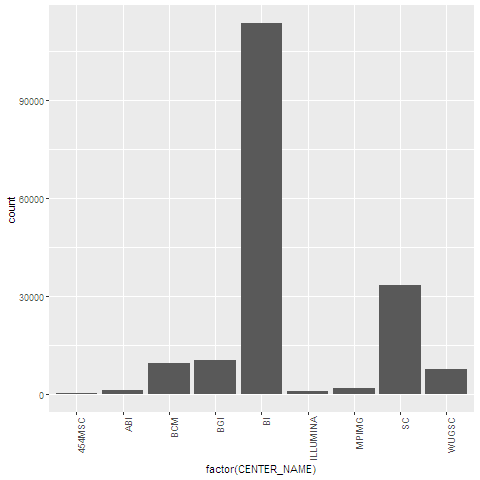

In [12]:
%%R
bar <- ggplot(seq_data) +  aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)

In [13]:
%%R
seq_data$POPULATION <- as.factor(seq_data$POPULATION)
yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT < 2E9 & seq_data$READ_COUNT < 3E7, ]

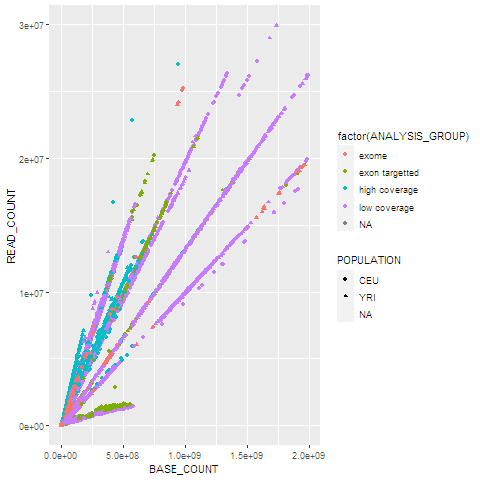

In [17]:
%%R
scatter <- ggplot(yri_ceu,
                  aes(x=BASE_COUNT, y=READ_COUNT,
                      col=factor(ANALYSIS_GROUP
                 ), shape=POPULATION)) + geom_point()
scatter # print(scatter) not mandatory

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


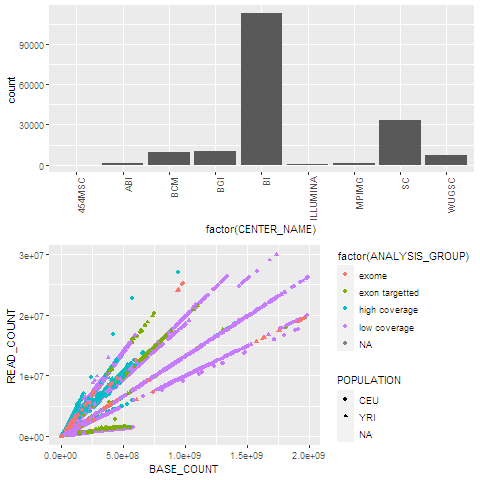

In [18]:
%%R
library(gridExtra)
library(grid)
g <- grid.arrange(bar, scatter, ncol=1)
g

In [19]:
%%R
png('fig.png')
g
dev.off()

png 
  2 
